### Question:
Design a class to implement a custom k-Nearest Neighbors (k-NN) classifier for a small dataset. The class should include methods to train the model, predict labels for new data points, and calculate the accuracy of the predictions.

In [6]:
import numpy as np
from collections import Counter

In [1]:
class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the k-NN classifier.
        :param k: Number of nearest neighbors to consider (default is 3)
        """
        self.k = k
        self.training_data = None
        self.training_labels = None
    
    def fit(self, data, labels):
        """
        Train the k-NN model by storing the training data and labels.
        :param data: 2D array of training data
        :param labels: 1D array of labels corresponding to the training data
        """
        self.training_data = np.array(data)
        self.training_labels = np.array(labels)
    
    def predict(self, test_data):
        """
        Predict the label for each data point in the test set.
        :param test_data: 2D array of test data
        :return: List of predicted labels
        """
        predictions = []
        for test_point in test_data:
            distances = np.sqrt(np.sum((self.training_data - test_point) ** 2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.training_labels[nearest_indices]
            majority_label = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append(majority_label)
        return predictions
    
    def accuracy(self, predicted_labels, true_labels):
        """
        Calculate the accuracy of predictions.
        :param predicted_labels: List of predicted labels
        :param true_labels: List of true labels
        :return: Accuracy as a percentage
        """
        correct_count = np.sum(np.array(predicted_labels) == np.array(true_labels))
        return (correct_count / len(true_labels)) * 100

In [2]:
# Sample training data and labels
training_data = [
    [1.0, 2.0],
    [2.0, 3.0],
    [3.0, 3.0],
    [6.0, 5.0],
    [7.0, 8.0],
    [8.0, 6.0]
]

In [3]:
training_labels = [0, 0, 0, 1, 1, 1]

In [4]:
# Test data and true labels
test_data = [
    [1.5, 2.5],
    [7.0, 7.0],
    [4.0, 4.0]
]
true_labels = [0, 1, 1]

In [7]:
# Initialize, train, and test the k-NN classifier
knn = KNNClassifier(k=3)
knn.fit(training_data, training_labels)

In [8]:
predictions = knn.predict(test_data)
print("Predicted Labels:", predictions)

Predicted Labels: [0, 1, 0]


In [9]:
accuracy = knn.accuracy(predictions, true_labels)
print("Accuracy:", accuracy, "%")

Accuracy: 66.66666666666666 %


In [14]:
import matplotlib.pyplot as plt

def plot_data(train_data, train_labels, test_data, test_labels=None, predictions=None):
    # Ensure inputs are NumPy arrays
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    test_data = np.array(test_data)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(train_labels)

    # Plot training data
    for label in unique_labels:
        points = train_data[train_labels == label]  # Correct filtering using boolean indexing
        plt.scatter(points[:, 0], points[:, 1], label=f"Class {label} (Train)")
    
    # Plot test data
    plt.scatter(test_data[:, 0], test_data[:, 1], c="black", marker="x", s=100, label="Test Points")
    
    # Annotate predictions if available
    if predictions is not None:
        for i, (x, y) in enumerate(test_data):
            plt.text(x + 0.1, y, f"Pred: {predictions[i]}", fontsize=10, color="black")
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title("k-NN Classification Visualization")
    plt.grid(True)
    plt.show()

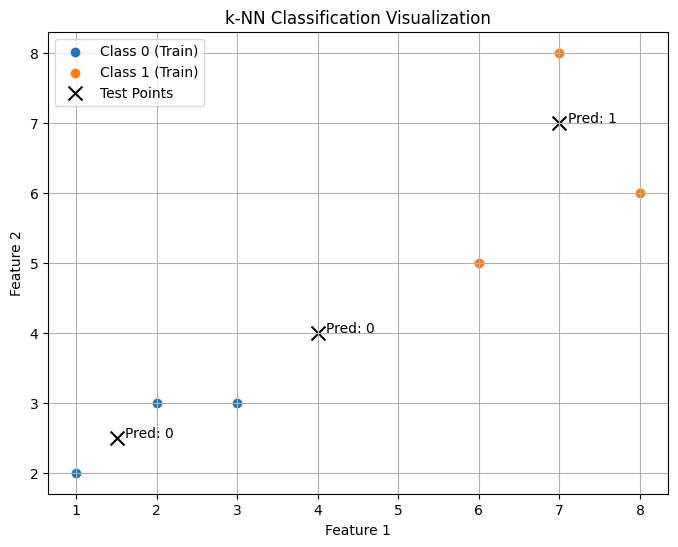

In [15]:
# Visualize data and predictions
plot_data(training_data, training_labels, test_data, predictions=predictions)